### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

### ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


#### Дисциплина: Методы машинного обучения

##### Студент: Мухамедияр Адиль
##### Группа: НКНбд-01-20

## Москва 2023
***

# Постановка задачи:

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:  

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

3. Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (архитектура сетей по вашему усмотрению).

4. Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

5. Сравните качество бинарной классификации нейронными сетями при помощи матрицы ошибок для тестовой выборки.

6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

7. Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (архитектура сетей по вашему усмотрению).

8. Сравните качество многоклассовой классификации нейронными сетями при помощи матрицы ошибок (для трех классов) для тестовой выборки.

9. Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

# Вариант №27



### Дополнение к основной задаче:

1. Набор данных deep_weeds 

2. Классы с метками 1,3,5 

## Решение:

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras


### Пункт 1

Загрузим из __Tensorflow datasets__ набор данных `deep_weeds`:

In [ ]:
# Загружаем наш датасет:
dataset = tfds.load("deep_weeds", split='train')
df = tfds.as_dataframe(dataset)

# Делим наш датасет на обучающую и тестовую выборки:
split_size = int(df.shape[0] * 0.25)
df_train = df[split_size:]
df_test = df[:split_size]

# Загрузим из обучающей выборки первое изображение:
train_shape = df_train.shape
test_shape = df_test.shape
print(train_shape)
print(test_shape)
print(df_train.iloc[0]['image'].shape)

(13132, 2)
(4377, 2)
(256, 256, 3)


### Пункт 2

In [ ]:
def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)
    
    num_row = 2
    num_col = 5 

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
# Для каждого изображения:
    for i in range(num_row * num_col):
# Считываем изображение:
        img = imgs[i] 
# Отображаем фото:
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

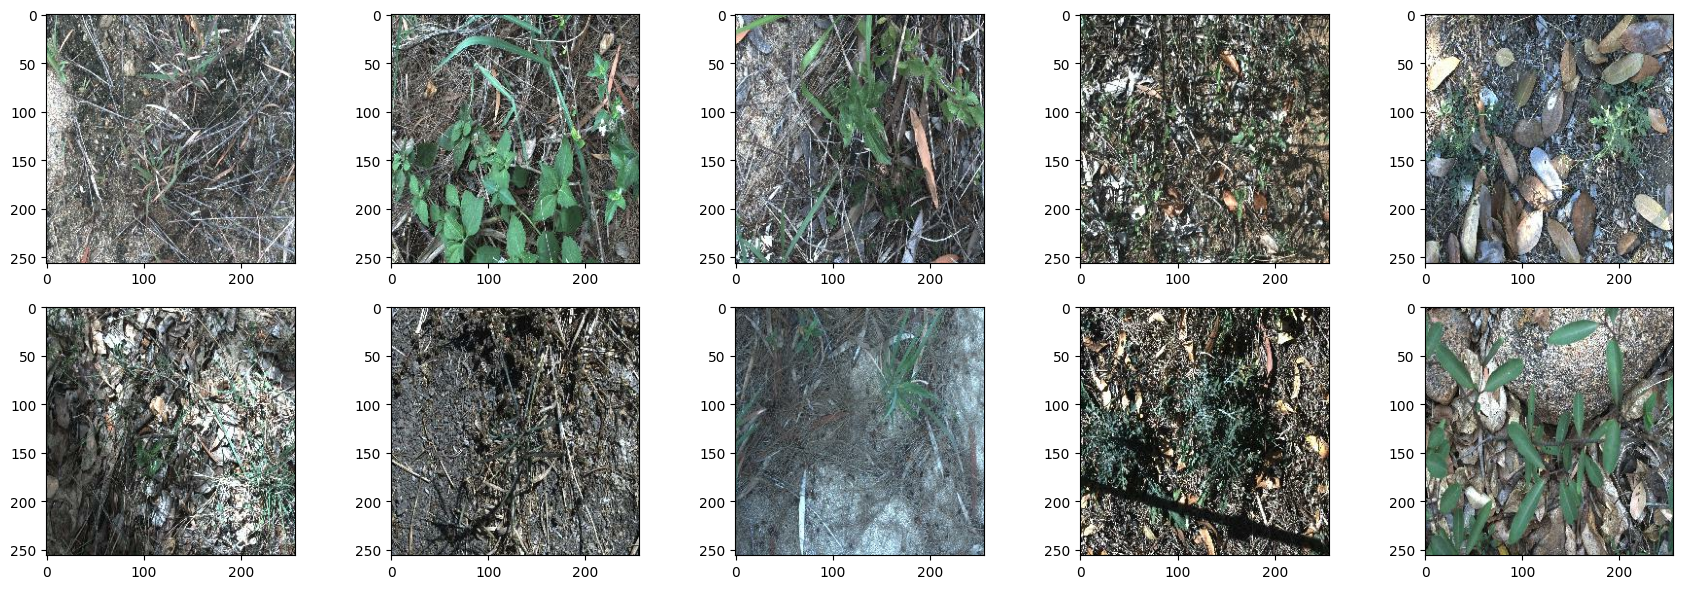

In [ ]:
plot_random_sample(df_train['image'])

### Пункт 3

In [ ]:
df_train_filter = df_train[df_train['label'].isin([1, 3])]
train_labels = df_train_filter['label'].to_numpy(dtype=np.float32)
train_labels_shape = train_labels.shape
train_images = np.zeros(shape=(train_labels_shape[0], 256, 256, 3), dtype=np.float32)
for idx in range(train_labels_shape[0]):
    train_images[idx, :, :, :] = np.array(Image.fromarray(df_train_filter.iloc[idx]['image']))

train_images_shape = train_images.shape
print(train_images_shape) #train

df_test_filter = df_test[df_test['label'].isin([1, 3])]
test_labels = df_test_filter['label'].to_numpy(dtype=np.float32)
test_labels_shape = test_labels.shape
test_images = np.zeros(shape=(test_labels_shape[0], 256, 256, 3), dtype=np.float32)
for idx in range(test_labels_shape[0]):
    test_images[idx, :, :, :] = np.array(Image.fromarray(df_test_filter.iloc[idx]['image']))

test_images_shape = test_images.shape
print(test_images_shape) # test


(1553, 256, 256, 3)
(533, 256, 256, 3)


Обучение модели

In [ ]:
train_images=train_images/255
test_images=test_images/255

train_labels = (train_labels - 2) / 2
test_labels = (test_labels - 2) / 2

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels))

Epoch 1/5
13/13 [==============================] - 22s 2s/step - loss: -7.0655 - accuracy: 0.0000e+00 - val_loss: -43.2807 - val_accuracy: 0.0000e+00
Epoch 2/5
13/13 [==============================] - 20s 2s/step - loss: -14.1942 - accuracy: 0.0000e+00 - val_loss: -104.4344 - val_accuracy: 0.0000e+00
Epoch 3/5
13/13 [==============================] - 20s 2s/step - loss: -52.8156 - accuracy: 0.0000e+00 - val_loss: -246.0374 - val_accuracy: 0.0000e+00
Epoch 4/5
13/13 [==============================] - 20s 1s/step - loss: -73.9905 - accuracy: 0.0000e+00 - val_loss: -321.8255 - val_accuracy: 0.0000e+00
Epoch 5/5
13/13 [==============================] - 18s 1s/step - loss: -153.1278 - accuracy: 0.0000e+00 - val_loss: -556.0354 - val_accuracy: 0.0000e+00


In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

history_2 = model_2.fit(
    train_images.reshape(-1, 256, 256, 3),
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images.reshape(-1, 256, 256, 3), test_labels))

Epoch 1/5


### Пункт 4


Визуализируем потери на обучающей и тестовой выборках и долю верных ответов (accuracy) на обучающей и тестовой выборках.

In [ ]:
from matplotlib import rcParams

plt.plot(np.arange(1, 6), history_1.history['loss'], label='Model_1_Training Loss')
plt.plot(np.arange(1, 6), history_1.history['val_loss'], label='Model_1_Validation Loss')

plt.plot(np.arange(1, 6), history_2.history['loss'], label='Model_2_Training Loss')
plt.plot(np.arange(1, 6), history_2.history['val_loss'], label='Model_2_Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
plt.plot(np.arange(1, 6), history_1.history['accuracy'], label='Model_1_Training Accuracy')
plt.plot(np.arange(1, 6), history_1.history['val_accuracy'], label='Model_1_Validation Accuracy')
plt.plot(np.arange(1, 6), history_2.history['accuracy'], label='Model_2_Training Accuracy')
plt.plot(np.arange(1, 6), history_2.history['val_accuracy'], label='Model_2_Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

### Пункт 5


In [ ]:
import seaborn as sns
# Предсказываем вероятности для тестовых данных:
y_pred_pr_1 = model_1.predict(test_images)

# Преобразовываем вероятности в двоичные прогнозы:
y_pred_1 = (y_pred_pr_1 > 0.5).astype(int)

# Вычисляем матрицу:
cm_1 = confusion_matrix(test_labels, y_pred_1)

# Постоим матрицу:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Pred_Labels')
plt.ylabel('True_Labels')
plt.title('Матрица первой модели')
plt.show()

In [ ]:
# Предсказываем вероятности для тестовых данных:
y_pred_pr_2 = model_2.predict(test_images)

# Преобразовываем вероятности в двоичные прогнозы:
y_pred_2 = (y_pred_pr_2 > 0.5).astype(int)

# Вычисляем матрицу:
cm_2 = confusion_matrix(test_labels, y_pred_2)

# Постоим матрицу:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Pred_Labels')
plt.ylabel('True_Labels')
plt.title('Матрица второй модели')
plt.show()

### Пункт 6


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_1 = model_1.predict(test_images)
y_pred_prob_2 = model_2.predict(test_images)

fpr_1, tpr_1, _ = roc_curve(test_labels, y_pred_prob_1)
fpr_2, tpr_2, _ = roc_curve(test_labels, y_pred_prob_2)

auc_1 = roc_auc_score(test_labels, y_pred_prob_1)
auc_2 = roc_auc_score(test_labels, y_pred_prob_2)

plt.plot(fpr_1, tpr_1, label='model_1 (AUC = {:.2f})'.format(auc_1))
plt.plot(fpr_2, tpr_2, label='model_2 (AUC = {:.2f})'.format(auc_2))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='low_right')
plt.grid(True)
plt.show()


In [ ]:
del df_train_filter
del train_labels
del train_images
del df_test_filter
del test_labels
del test_images

### Пункт 7

In [ ]:
import numpy as np
from PIL import Image

def image_generator(data_frame):
    for idx in range(data_frame.shape[0]):
        image = np.array(Image.fromarray(data_frame.iloc[idx]['image']))
        image = image / 255.0  # normalize image values
        label = (data_frame.iloc[idx]['label'] - 1) // 2  # Поменяем линии 1, 3, 5 на 0, 1, 2.
        yield image, label

# Train
df_train_filter = df_train[df_train['label'].isin([1, 3, 5])]
train_images = []
train_labels = []
for image, label in image_generator(df_train_filter):
    train_images.append(image)
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

print(f"Train_images_shape:", train_images.shape)
print(f"Train_labels:", train_labels)

# Test
df_test_filter = df_test[df_test['label'].isin([1, 3, 5])]
test_images = []
test_labels = []
for image, label in image_generator(df_test_filter):
    test_images.append(image)
    test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

print(f"Test_images_shape:", test_images.shape)
print(f"Test_labels:", test_labels[:3])

In [ ]:
del df_train_filter
del df_test_filter
del df_train
del df_test

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(3, activation='softmax')])

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

history_3 = model_3.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels))

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(3, activation='softmax')])

model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

history_4 = model_4.fit(
    train_images.reshape(-1, 256, 256, 3),+
    train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(test_images.reshape(-1, 256, 256, 3), test_labels))

### Пункт 8

In [ ]:
# Предсказываем вероятности для тестовых данных:
test_predictions = model_3.predict(test_images.reshape(-1, 256, 256, 3))
test_predictions = np.argmax(test_predictions, axis=1)

# Генрируем матрицу ошибок:
cm_3 = confusion_matrix(test_labels, test_predictions)

# Строим матрицу ошибок:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted_Labels')
plt.ylabel('True_Labels')
plt.title('Матрица третей модели')
plt.show()

In [ ]:
# Предсказываем вероятности для тестовых данных:
test_predictions = model_4.predict(test_images.reshape(-1, 256, 256, 3))
test_predictions = np.argmax(test_predictions, axis=1)

# Генрируем матрицу ошибок:
cm_4 = confusion_matrix(test_labels, test_predictions)

# Строим матрицу ошибок:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted_Labels')
plt.ylabel('True_Labels')
plt.title('Матрица четвертой модели')
plt.show()

### Пункт 9

Строим кривые обучения нейронных сетей

In [ ]:
plt.plot(np.arange(1, 6), history_3.history['loss'], label='Model3_Training Loss')
plt.plot(np.arange(1, 6), history_3.history['val_loss'], label='Model3_Validation Loss')
plt.plot(np.arange(1, 6), history_4.history['loss'], label='Model4_Training Loss')
plt.plot(np.arange(1, 6), history_4.history['val_loss'], label='Model4_Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
plt.plot(np.arange(1, 6), history_3.history['accuracy'], label='Model3_Training Accuracy')
plt.plot(np.arange(1, 6), history_3.history['val_accuracy'], label='Model3_Validation Accuracy')
plt.plot(np.arange(1, 6), history_4.history['accuracy'], label='Model4_Training Accuracy')
plt.plot(np.arange(1, 6), history_4.history['val_accuracy'], label='Model4_Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();